# Heaps

### Hilfsfunktionen zur Darstellung eines Arrays als vollständigen Binärbaum

Bevor wir mit der Implementation von Heaps beginnen, schreiben wir eine Hilfsmethode, die uns ein Array als Baum interpretieren lässt und diesen graphisch darstellt. Sie müssen diesen Code nicht verstehen, sondern nur wissen, dass die Methode ```showArrayAsTree(a)``` die Elemente ```a[1], ..., a[N]``` eines Arrays ```a``` als Baum darstellt. 

In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import math

def _buildGraph(g, a, k, xPos, N):
    height = math.floor(math.log(N, 2)) # Höhe vom Baum
    depth = math.floor(math.log(k, 2)) # Tiefe des aktuellen Knotens
    if k >= N:
        return
    else:
        y = (height - depth)
        g.add_node(k, pos=(xPos, y), label=str(a[k]))
        if k > 1: g.add_edge(k, k // 2)
        _buildGraph(g, a, k *2 , xPos - 2**(height - depth), N)
        _buildGraph(g, a, k * 2 + 1, xPos + 2**(height - depth),  N)
        
    
def showArrayAsTree(a):
    g = nx.Graph()
    _buildGraph(g, a, 1, len(a) / 2 + 1, len(a))
    pos=nx.get_node_attributes(g,'pos')
    labels = nx.get_node_attributes(g, 'label')
    
    nx.draw_networkx_nodes(g, pos, node_size=1000, node_color='#00b4d9')
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.show()

## Hilfsfunktionen swim und sink

Wir beginnen mit der Implementation der wichtigsten Heap Funktionen, nämlich ```swim``` und ```sink```.

```swim``` bringt das $k$-te Element durch Vertauschen mit dem Parent nach oben, bis die Heapbedingung wieder erfüllt ist. 

In [3]:
def swim(heap, k):
    
    # Solange nicht wurzel und Parent kleiner ist
    while k > 1 and heap[k // 2] < heap[k]:
        
        # Tausche Parent Kind
        heap[k // 2], heap[k] = heap[k], heap[k // 2]
        
        # Gehe zu parent
        k = k // 2      

```sink``` bringt das $k$-te Element durch Vertauschen mit dem jeweils grösseren Kind nach unten, bis die Heapbedingung wieder erfüllt ist.
Mit dem optionalen Element ```N``` können wir auch angeben, dass nur der Teil vom Array bis zum Element mit Index ```N``` betrachtet wird. 

In [4]:
def sink(heap, k, N = None):
    
    if N == None: N = len(heap) - 1
        
    while 2 * k <= N: # solange mindestens ein Kind
        j = 2 * k # gehe zu Kind
        
        # Wähle Kind mit grösserem Wert falls beide vorhanden
        if j < N and heap[j] < heap[j + 1]:
            j += 1 
        
        # Abbrechen wenn parent nicht mehr grösser ist
        if not heap[k] < heap[j]:
            break
        # Tausch
        heap[j], heap[k] = heap[k], heap[j]
        
        # Weiter mit Kind
        k = j

Mittels der Methode ```swim``` können wir nun jedes Array so umsortieren, dass es die Heapbedingung erfüllt. 

In [47]:
def heapify(heap):
    for i in range(1, len(heap)):
        swim(heap, i)

Jetzt können wir unsere Methoden testen:

Zuerst testen wir die Darstellung für ein Array, welches die Heapbedingung nicht erfüllt:

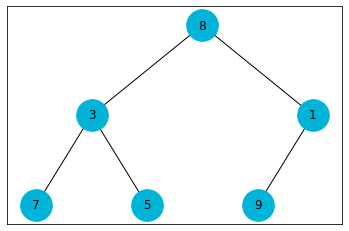

In [48]:
xs = [None, 8, 3, 1, 7, 5, 9]
showArrayAsTree(xs)

Nun stellen wir die Heapbedingung her und visualisieren das Array nochmals.

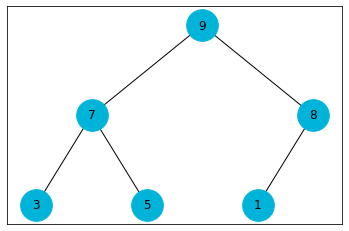

In [49]:
heapify(xs)
showArrayAsTree(xs)

Wie wir sehen, hat die Methode ```heapify``` die Heapbedingung wiederhergestellt. 


#### Experiment

* Erstellen Sie ein heap und verletzen Sie dann die Heapbedingung punktuell. Rufen Sie dann die Methoden ```sink``` und ```swim``` auf, um die Heapbedinung wiederherzustellen. Visualisieren Sie die Zwischenschritte mit der Methode ```showArrayAsTree``` und experimentieren Sie mit verschiedenen Arrays.


# Priority Queue mittels eines Heaps implementieren

Das Implementieren einer Priority Queue ist nun fast trivial. 
Die Funktionen ```sink``` und ```swim``` übernehmen die ganze Arbeit.
Um das grösste Elment (die Wurzel) zu entfernen wird diese mit dem Element unten Rechts im heap vertauscht, welches gerade das letzte Element im Array ist. Das grösste Element kann effizient entfernt werden. 

Am Ende muss die Heapbedinung durch aufruf von `sink` wiederhergestellt werden. 

Auch das Einfügen ist einfach. Hier brauchen Sie aber die Methode `swim`.

#### Übung

* Implementieren Sie den Datentyp Priorityqueue mithilfe eines Heaps. 

In [56]:
class PQ:
    def __init__(self):
        self.data = [None]  # The heap datastructure
        
    def isEmpty(self):
         return self.size() == 0
        
    def size(self):
        return len(self.data) - 1
    
    def delmax(self):
        pass # Ihre Lösung
    
    def max(self):
        pass # Ihre Lösung
    
    def insert(self, item):
        pass # Ihre Lösung
        

Mittels einem Heap können wir Daten einfach sortieren. Wir fügen die Elemente einfach in eine PQ ein und nehmen immer das Grösste raus. Da ```swim``` und ```sink``` beide $O(log(N))$ Operationen brauchen, ist es offensichtlich, dass das Sortieren in $O(N log(N))$ Operationen geht.

In [53]:
testdata = [1,5, 2, 8 , 11]
pq = PQ()
for t in testdata:
    pq.insert(t)

sortedArray = []
while not pq.isEmpty():
    sortedArray.append(pq.delmax())

In [54]:
sortedArray

[]

#### Übung

* Implementieren Sie das Anwendungsbeispiel, welches die kleinsten $M$ Elemente aus einem Stream sucht mit dieser Implementation von PriorityQueues. (Den Code finden Sie im Jupyter-Notebook zum Thema Priorityqueues). Vergleichen Sie die Laufzeit für verschiedene Werte von $M$. Was beobachten Sie?

In [55]:
# Ihre Lösung

# Teil 2: Heapsort

Wir haben im obigen Teil gesehen, dass wir mithilfe eines Heaps einen Sortieralgorithmus implementieren können. Sortieren geht aber noch etwas eleganter, und vor allem ohne zusätzlichen Speicherverbrauch. Die nachfolgende Änderungen implementieren den berühmte *Heapsort* Algorithmus. 

Als erstes schauen wir uns die Funktion ```heapify``` an. Diese können wir noch etwas effizienter implementieren indem wir das Array von rechts nach links traversieren und jeweils mittels ```sink``` die Heapbedingung wiederherstellen. Dabei müssen wir nicht von ganz hinten anfangen (warum?).

In [10]:
def heapify(a):
    N = len(a) - 1
    k = N // 2
    while k >= 1:
        sink(a, k)
        showArrayAsTree(a)
        k = k - 1

Wir testen dies für ein beliebiges Array:

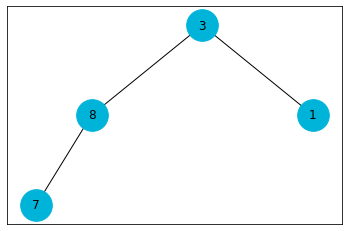

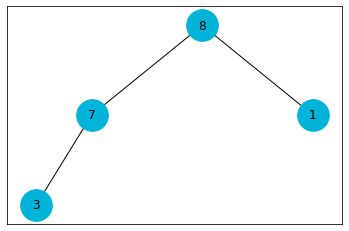

In [11]:
xs = [None, 3, 7, 1, 8]
heapify(xs)

Der Heapsort besteht jetzt aus 2 Schritten. 

1. Heap herstellen
2. Grösstes Element mit letztem Element tauschen und Heap herstellen
   * Dabei wird der Bereich im Array, auf dem Heapsort arbeitet, immer kleiner

In [41]:
def heapsort(a):
    N = len(a) - 1
    for k in range(int(N//2), 0, -1):
        sink(a, k)
    while N > 1:
        a[1], a[N] = a[N], a[1]
        N -= 1
        sink(a, 1, N)      

In [43]:
testArray = [None, 3, 1, 8, 11, 7, 9, 15]


heapsort(testArray)
print(testArray)

[None, 1, 3, 7, 8, 9, 11, 15]
